# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from solver import Point, Facility, Customer, length, load_data
from vis import view_problem

In [3]:
path = 'data'
ls = os.listdir

In [131]:
# print(*ls(path),sep = '  ,  ')
for i,file in enumerate(ls(path)):
    customers, facilities = load_data(file)
    print(f'{file:15} {len(customers):6} Customers \t{len(facilities):6} Facilities')

fl_1000_2         1500 Customers 	  1000 Facilities
fl_1000_3         5000 Customers 	  1000 Facilities
fl_100_1          1000 Customers 	   100 Facilities
fl_100_10          100 Customers 	   100 Facilities
fl_100_11          500 Customers 	   100 Facilities
fl_100_12          500 Customers 	   100 Facilities
fl_100_13         1000 Customers 	   100 Facilities
fl_100_14          800 Customers 	   100 Facilities
fl_100_2          1000 Customers 	   100 Facilities
fl_100_3          1000 Customers 	   100 Facilities
fl_100_4          1000 Customers 	   100 Facilities
fl_100_5          1000 Customers 	   100 Facilities
fl_100_6           100 Customers 	   100 Facilities
fl_100_7           100 Customers 	   100 Facilities
fl_100_8           100 Customers 	   100 Facilities
fl_100_9           100 Customers 	   100 Facilities
fl_16_1             50 Customers 	    16 Facilities
fl_16_2             50 Customers 	    16 Facilities
fl_2000_2         2000 Customers 	  2000 Facilities
fl_2000_3   

In [137]:
customers, facilities = load_data('fl_100_7')
(customers, facilities)

([Customer(index=0, demand=2, location=Point(x=42.025527, y=33.616725)),
  Customer(index=1, demand=2, location=Point(x=41.980592, y=34.211489)),
  Customer(index=2, demand=4, location=Point(x=57.023391, y=34.309149)),
  Customer(index=3, demand=5, location=Point(x=3.657277, y=29.06113)),
  Customer(index=4, demand=3, location=Point(x=49.152254, y=36.213567)),
  Customer(index=5, demand=1, location=Point(x=33.925347, y=31.222968)),
  Customer(index=6, demand=5, location=Point(x=60.883163, y=42.991909)),
  Customer(index=7, demand=3, location=Point(x=49.793091, y=38.717563)),
  Customer(index=8, demand=4, location=Point(x=56.820527, y=36.707275)),
  Customer(index=9, demand=1, location=Point(x=34.301367, y=30.778683)),
  Customer(index=10, demand=1, location=Point(x=34.176174, y=31.355789)),
  Customer(index=11, demand=1, location=Point(x=34.23757, y=31.277996)),
  Customer(index=12, demand=2, location=Point(x=41.402673, y=34.168284)),
  Customer(index=13, demand=5, location=Point(x=60.

# Visualisation


In [15]:
from vis import view_problem, view_solution

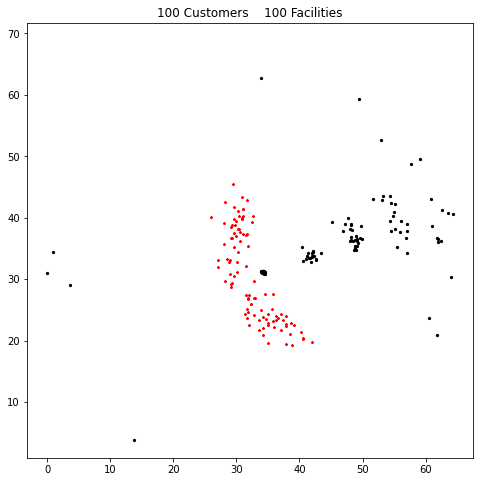

In [138]:
view_problem(customers,facilities)

In [139]:
sol = greedy(customers,facilities)

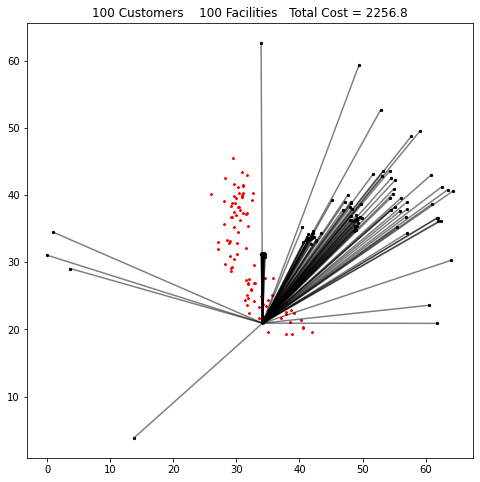

In [140]:
view_solution(sol,customers,facilities)

# Exploration

In [47]:
from calc import validate, total_cost

from algorithms import greedy
from exceptions import *

## Random allocation

In [48]:
from pdb import set_trace


In [117]:
from tqdm.auto import tqdm, trange


def random_allocation(customers, facilities):
    max_iter = 10000
    n_fac = len(facilities)
    allocations = -np.ones(len(customers))
    remaining_capacity = np.array([f.capacity for f in facilities])
    for i, customer in enumerate(customers):
        for counter in range(max_iter):
            selected_facility = np.random.choice(
                range(n_fac),
                p=remaining_capacity / remaining_capacity.sum(),
            )
            if remaining_capacity[selected_facility] >= customer.demand:
                remaining_capacity[selected_facility] -= customer.demand
                allocations[i] = selected_facility
                break
        else:
            raise IterationError('Maximum number of iterations reached.')
    return allocations.astype(int)


def local_search(solution, customers, facilities, verbose=False):
    allocations = solution.copy()
    n_cutomers = len(customers)
    n_facilities = len(facilities)
    old_cost = total_cost(allocations, customers, facilities)
    pbar = trange(n_cutomers)
    for i in pbar:
        customer = customers[i]
        costs = np.zeros(n_facilities)
        old_alloc = allocations[i]
        for j in range(n_facilities):
            allocations[i] = j
            costs[j] = total_cost(allocations, customers, facilities)
        new_alloc = np.argmin(costs)
        allocations[i] = new_alloc
        if verbose:
            desc = '{:.1f} --> {:.1f} --> {:.1f}'.format(
                old_cost,
                costs[old_alloc],
                costs[new_alloc],
            )
            pbar.set_description(desc)
    return allocations

In [133]:
sol = random_allocation(customers,facilities)
total_cost(sol,customers,facilities)

109775306.1991202

In [134]:
sol2 = local_search(sol,customers,facilities,True)

In [135]:
sol = greedy(customers,facilities)
total_cost(sol,customers,facilities)

26090682.612702664

In [136]:
sol2 = local_search(sol,customers,facilities,True)

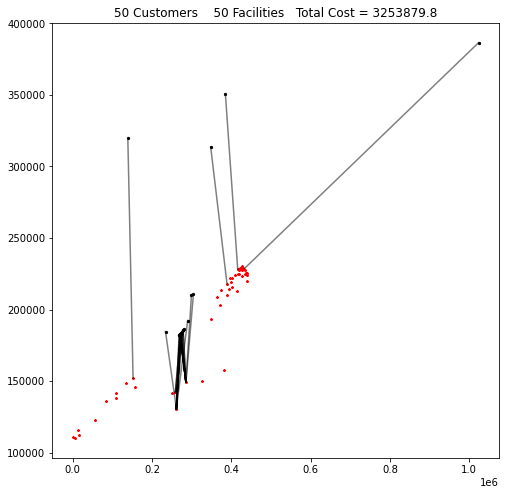

In [88]:
view_solution(sol2,customers,facilities)

In [141]:
validate(sol2,customers,facilities)

IndexError: list index out of range

## Constraint Programming

### Uncapacitated Facilities

In [143]:
from ortools.sat.python.cp_model import CpModel, CpSolver